## Correct Crosswalk

In [1]:
import altair as alt
import calitp_data_analysis.magics
import geopandas as gpd
import google.auth
import pandas as pd
import yaml
from IPython.display import HTML, Image, Markdown, display, display_html
from omegaconf import OmegaConf
from segment_speed_utils import gtfs_schedule_wrangling, time_series_utils
from shared_utils import (
    catalog_utils,
    gtfs_utils_v2,
    portfolio_utils,
    publish_utils,
    rt_dates,
    rt_utils,
)
from update_vars import GTFS_DATA_DICT, RT_SCHED_GCS, SCHED_GCS, SEGMENT_GCS

readable_dict = OmegaConf.load("readable2.yml")
credentials, project = google.auth.default()

import _report_route_dir_visuals
import merge_data

In [2]:
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

In [3]:
# portfolio_name = "City and County of San Francisco"
portfolio_name = "Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"

In [4]:
date_list = rt_dates.y2025_dates

## `concatenate_crosswalk_organization` in `merge_data`

In [60]:
FILE = GTFS_DATA_DICT.schedule_tables.gtfs_key_crosswalk

crosswalk_cols = [
    "schedule_gtfs_dataset_key",
    "name",
    "schedule_source_record_id",
    "base64_url",
    "organization_source_record_id",
    "organization_name",
    "caltrans_district",
]

In [61]:
df = time_series_utils.concatenate_datasets_across_dates(
    SCHED_GCS, FILE, date_list, data_type="df", columns=crosswalk_cols
)

In [65]:
df.loc[df.name.str.contains("VCTC")][["name","organization_name"]]

,name,organization_name
162,VCTC GMV Schedule,City of Camarillo
163,VCTC GMV Schedule,Gold Coast Transit District
164,VCTC GMV Schedule,City of Moorpark
165,VCTC GMV Schedule,City of Ojai
166,VCTC GMV Schedule,City of Simi Valley
167,VCTC GMV Schedule,City of Thousand Oaks
168,VCTC GMV Schedule,Ventura County Transportation Commission
162,VCTC GMV Schedule,City of Camarillo
163,VCTC GMV Schedule,Gold Coast Transit District
164,VCTC GMV Schedule,City of Moorpark


In [8]:
with open("../_shared_utils/shared_utils/portfolio_organization_name.yml", "r") as f:
    PORTFOLIO_ORGANIZATIONS_DICT = yaml.safe_load(f)

In [9]:
df = df.assign(
    caltrans_district=df.caltrans_district.map(portfolio_utils.CALTRANS_DISTRICT_DICT)
).pipe(
    portfolio_utils.standardize_portfolio_organization_names,
    PORTFOLIO_ORGANIZATIONS_DICT,
)

In [10]:
df.head(2)

,schedule_gtfs_dataset_key,name,schedule_source_record_id,base64_url,caltrans_district,service_date,portfolio_organization_name
0,ff1bc5dde661d62c877165421e9ca257,Santa Ynez Mecatran Schedule,recuWhPXfxMatv6rL,aHR0cDovL2FwcC5tZWNhdHJhbi5jb20vdXJiL3dzL2ZlZWQvYzJsMFpUMXplWFowTzJOc2FXVnVkRDF6Wld4bU8yVjRjR2x5WlQwN2RIbHdaVDFuZEdaek8ydGxlVDAwTWpjd056UTBaVFk0TlRBek9UTXlNREl4TURkak56STBNRFJrTXpZeU5UTTRNekkwWXpJMA==,05 - San Luis Obispo / Santa Barbara,2025-01-15,City of Solvang
1,f4c3ea214214ee0d96f7646b3e9d69dc,SLO Peak Transit Schedule,rec0EeeizKvsEDfRQ,aHR0cDovL2RhdGEucGVha3RyYW5zaXQuY29tL3N0YXRpY2d0ZnMvMS9ndGZzLnppcA==,05 - San Luis Obispo / Santa Barbara,2025-01-15,San Luis Obispo Regional Transit Authority


In [11]:
df.loc[df.portfolio_organization_name == portfolio_name]

,schedule_gtfs_dataset_key,name,schedule_source_record_id,base64_url,caltrans_district,service_date,portfolio_organization_name
162,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-01-15,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
162,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-02-12,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
159,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-03-12,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
162,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-04-16,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
158,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-05-14,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"


In [12]:
df_sched = merge_data.concatenate_schedule_by_route_direction(date_list)

df_avg_speeds = merge_data.concatenate_speeds_by_route_direction(date_list)

df_rt_sched = merge_data.concatenate_rt_vs_schedule_by_route_direction(date_list)

In [13]:
df_sched.head(2)

,schedule_gtfs_dataset_key,route_id,direction_id,time_period,avg_scheduled_service_minutes,avg_stop_miles,n_scheduled_trips,frequency,service_date,is_express,is_ferry,is_rail,is_coverage,is_local,is_downtown_local,is_rapid,typology,name,combined_name,recent_combined_name,recent_route_id,route_primary_direction
0,0139b1253130b33adcd4b3a4490530d2,0177a66b-9f33-407d-a72e-776429fb73d4,NaN,all_day,63.50,0.92,2,0.08,2025-01-15,0.00,0.00,0.00,1.00,0.00,0.00,0.00,coverage,TCRTA TripShot Schedule,C70 LOOP__70,C70 LOOP 70,0177a66b-9f33-407d-a72e-776429fb73d4,Eastbound
1,0139b1253130b33adcd4b3a4490530d2,0177a66b-9f33-407d-a72e-776429fb73d4,NaN,all_day,63.50,5.98,2,0.08,2025-02-12,0.00,0.00,0.00,1.00,0.00,0.00,0.00,coverage,TCRTA TripShot Schedule,C70 LOOP__70,C70 LOOP 70,0177a66b-9f33-407d-a72e-776429fb73d4,Eastbound


In [14]:
df_avg_speeds.head(2)

,schedule_gtfs_dataset_key,route_id,direction_id,time_period,speed_mph,service_date
0,0139b1253130b33adcd4b3a4490530d2,0177a66b-9f33-407d-a72e-776429fb73d4,NaN,all_day,33.49,2025-04-16
1,0139b1253130b33adcd4b3a4490530d2,0177a66b-9f33-407d-a72e-776429fb73d4,NaN,peak,33.49,2025-04-16


In [15]:
df_rt_sched.head(2)

,schedule_gtfs_dataset_key,route_id,direction_id,time_period,minutes_atleast1_vp,minutes_atleast2_vp,total_rt_service_minutes,total_scheduled_service_minutes,total_vp,vp_in_shape,is_early,is_ontime,is_late,n_vp_trips,vp_per_minute,pct_in_shape,pct_rt_journey_atleast1_vp,pct_rt_journey_atleast2_vp,pct_sched_journey_atleast1_vp,pct_sched_journey_atleast2_vp,rt_sched_journey_ratio,avg_rt_service_minutes,service_date
0,0139b1253130b33adcd4b3a4490530d2,0177a66b-9f33-407d-a72e-776429fb73d4,NaN,all_day,159,158,156.95,127.00,473,390,0,1,1,2,3.01,0.82,1.00,1.00,1.00,1.00,1.24,78.47,2025-01-15
1,0139b1253130b33adcd4b3a4490530d2,0177a66b-9f33-407d-a72e-776429fb73d4,NaN,all_day,161,159,158.92,127.00,479,378,0,1,1,2,3.01,0.79,1.00,1.00,1.00,1.00,1.25,79.46,2025-02-12


In [16]:
df2 = merge_data.merge_data_sources_by_route_direction(
    df_sched, df_rt_sched, df_avg_speeds, df
)

In [59]:
df.loc[df.name.str.contains("VCTC")][["schedule_gtfs_dataset_key"]]

,schedule_gtfs_dataset_key,name,schedule_source_record_id,base64_url,caltrans_district,service_date,portfolio_organization_name
162,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-01-15,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
162,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-02-12,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
159,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-03-12,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
162,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-04-16,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
158,1770249a5a2e770ca90628434d4934b1,VCTC GMV Schedule,recrAG7e0oOiR6FiP,aHR0cHM6Ly9nb3ZjYnVzLmNvbS9ndGZz,07 - Los Angeles / Ventura,2025-05-14,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"


## Clarification on this portion of `merge_data.py`
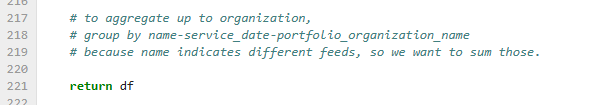

## Check Ventura County Route 80 

In [17]:
df2.columns

Index(['schedule_gtfs_dataset_key', 'route_id', 'direction_id', 'time_period',
       'avg_scheduled_service_minutes', 'avg_stop_miles', 'n_scheduled_trips',
       'frequency', 'service_date', 'is_express', 'is_ferry', 'is_rail',
       'is_coverage', 'is_local', 'is_downtown_local', 'is_rapid', 'typology',
       'name', 'combined_name', 'recent_combined_name', 'recent_route_id',
       'route_primary_direction', 'minutes_atleast1_vp', 'minutes_atleast2_vp',
       'total_rt_service_minutes', 'total_scheduled_service_minutes',
       'total_vp', 'vp_in_shape', 'is_early', 'is_ontime', 'is_late',
       'n_vp_trips', 'vp_per_minute', 'pct_in_shape',
       'pct_rt_journey_atleast1_vp', 'pct_rt_journey_atleast2_vp',
       'pct_sched_journey_atleast1_vp', 'pct_sched_journey_atleast2_vp',
       'rt_sched_journey_ratio', 'avg_rt_service_minutes', 'sched_rt_category',
       'speed_mph', 'schedule_source_record_id', 'base64_url',
       'caltrans_district', 'portfolio_organization_name']

In [18]:
df2.service_date.unique()

array(['2025-01-15T00:00:00.000000000', '2025-02-12T00:00:00.000000000',
       '2025-03-12T00:00:00.000000000', '2025-04-16T00:00:00.000000000',
       '2025-05-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
route_80_89 = df2.loc[
    (df2.portfolio_organization_name == portfolio_name)
    & (df2.recent_combined_name == "80-89 Coastal Express")
    & (df2.service_date == "2025-05-14T00:00:00.000000000")
]

In [20]:
route_80_89.name.value_counts()

VCTC GMV Schedule    239
Name: name, dtype: int64

### There are two directions, 3 time periods so I should only see 6 rows per date? Also there are many duplicates -> dropped from 239 to 41. 

In [21]:
len(route_80_89), len(route_80_89.drop_duplicates())

(239, 41)

In [22]:
route_80_89_dedup = route_80_89.drop_duplicates()

In [23]:
route_80_89_dedup.columns

Index(['schedule_gtfs_dataset_key', 'route_id', 'direction_id', 'time_period',
       'avg_scheduled_service_minutes', 'avg_stop_miles', 'n_scheduled_trips',
       'frequency', 'service_date', 'is_express', 'is_ferry', 'is_rail',
       'is_coverage', 'is_local', 'is_downtown_local', 'is_rapid', 'typology',
       'name', 'combined_name', 'recent_combined_name', 'recent_route_id',
       'route_primary_direction', 'minutes_atleast1_vp', 'minutes_atleast2_vp',
       'total_rt_service_minutes', 'total_scheduled_service_minutes',
       'total_vp', 'vp_in_shape', 'is_early', 'is_ontime', 'is_late',
       'n_vp_trips', 'vp_per_minute', 'pct_in_shape',
       'pct_rt_journey_atleast1_vp', 'pct_rt_journey_atleast2_vp',
       'pct_sched_journey_atleast1_vp', 'pct_sched_journey_atleast2_vp',
       'rt_sched_journey_ratio', 'avg_rt_service_minutes', 'sched_rt_category',
       'speed_mph', 'schedule_source_record_id', 'base64_url',
       'caltrans_district', 'portfolio_organization_name']

In [24]:
route_80_89_dedup.time_period.value_counts()

all_day    19
offpeak    13
peak        9
Name: time_period, dtype: int64

### What about unique route ID's that are repeated for the same `key, recent_combined_name,service_date, and portfolio_organization_name` combo?

In [67]:
route_80_89_dedup.route_id.unique()

array(['4134', '4136', '4137', '4138', '4141', '4142', '4143', '4144',
       '4145', '4146', '4147', '4148'], dtype=object)

In [66]:
route_80_89_dedup.loc[
    (route_80_89_dedup.time_period == "peak") & (route_80_89_dedup.direction_id == 1)
][
    [
        "portfolio_organization_name",
        "recent_combined_name",
        "route_id",
        "recent_route_id",
        "direction_id",
        "time_period",
        "avg_scheduled_service_minutes",
        "avg_stop_miles",
        "n_scheduled_trips",
        "frequency",
        "route_primary_direction",
        # "minutes_atleast1_vp",
        # "minutes_atleast2_vp",
        # "total_rt_service_minutes",
        # "total_scheduled_service_minutes",
        # "total_vp",
        # "vp_in_shape",
        # "is_early",
        # "is_ontime",
        # "is_late",
        # "n_vp_trips",
        "vp_per_minute",
        "pct_in_shape",
        "pct_rt_journey_atleast1_vp",
        "pct_rt_journey_atleast2_vp",
        "pct_sched_journey_atleast1_vp",
        "pct_sched_journey_atleast2_vp",
        "rt_sched_journey_ratio",
        "avg_rt_service_minutes",
        "speed_mph",
    ]
].T

,13835,13934,14004,14109,14173,14237,14307,14377
portfolio_organization_name,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)","Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)","Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)","Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)","Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)","Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)","Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)","Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"
recent_combined_name,80-89 Coastal Express,80-89 Coastal Express,80-89 Coastal Express,80-89 Coastal Express,80-89 Coastal Express,80-89 Coastal Express,80-89 Coastal Express,80-89 Coastal Express
route_id,4134,4136,4137,4141,4143,4145,4146,4148
recent_route_id,4134,4136,4137,4141,4143,4145,4146,4148
direction_id,1,1,1,1,1,1,1,1
time_period,peak,peak,peak,peak,peak,peak,peak,peak
avg_scheduled_service_minutes,86.80,50.00,125.50,128.00,129.00,106.00,129.00,149.67
avg_stop_miles,7.71,32.10,28.88,17.82,3.70,2.91,38.06,5.57
n_scheduled_trips,5,1,2,2,1,2,1,3
frequency,0.62,0.12,0.25,0.25,0.12,0.25,0.12,0.38


# Aggregation per my notebook #17
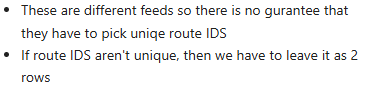
* Need clarification (yes even though I wrote this myself). IF the route IDs are repeated, then we leave them as two rows. What does unpacking any route IDs that are repeated across different `keys` mean?
* Confirm if two different `names` have thes ame `key` that means this is the same feed. 

In [27]:
df2.head(1)

,schedule_gtfs_dataset_key,route_id,direction_id,time_period,avg_scheduled_service_minutes,avg_stop_miles,n_scheduled_trips,frequency,service_date,is_express,is_ferry,is_rail,is_coverage,is_local,is_downtown_local,is_rapid,typology,name,combined_name,recent_combined_name,recent_route_id,route_primary_direction,minutes_atleast1_vp,minutes_atleast2_vp,total_rt_service_minutes,total_scheduled_service_minutes,total_vp,vp_in_shape,is_early,is_ontime,is_late,n_vp_trips,vp_per_minute,pct_in_shape,pct_rt_journey_atleast1_vp,pct_rt_journey_atleast2_vp,pct_sched_journey_atleast1_vp,pct_sched_journey_atleast2_vp,rt_sched_journey_ratio,avg_rt_service_minutes,sched_rt_category,speed_mph,schedule_source_record_id,base64_url,caltrans_district,portfolio_organization_name
0,0139b1253130b33adcd4b3a4490530d2,0177a66b-9f33-407d-a72e-776429fb73d4,0,all_day,63.50,0.92,2,0.08,2025-01-15,0.00,0.00,0.00,1.00,0.00,0.00,0.00,coverage,TCRTA TripShot Schedule,C70 LOOP__70,C70 LOOP 70,0177a66b-9f33-407d-a72e-776429fb73d4,Eastbound,159,158,156.95,127.00,473,390,0,1,1,2,3.01,0.82,1.00,1.00,1.00,1.00,1.24,78.47,schedule_and_vp,NaN,recGeFW9Cz2cr1jJd,aHR0cHM6Ly90Y3J0YS50cmlwc2hvdC5jb20vdjEvZ3Rmcy56aXA_cmVnaW9uSWQ9Q0E1NThEREMtRDdGMi00QjQ4LTlDQUMtREVFQTExMzRGODIw,06 - Fresno / Bakersfield,Tulare County Regional Transit Agency


## Check if route_name-direction are unique to the portfolio_organization_name

In [28]:
unique_route_names = (
    df2.groupby(["service_date", "recent_combined_name"])
    .agg({"portfolio_organization_name": "nunique"})
    .reset_index()
)

In [29]:
unique_route_names2 = unique_route_names.loc[
    unique_route_names.portfolio_organization_name > 1
]

In [30]:
unique_route_names2.shape

(193, 3)

In [31]:
unique_route_names2.sort_values(
    by=["portfolio_organization_name"], ascending=False
).head()

,service_date,recent_combined_name,portfolio_organization_name
2119,2025-01-15,Route 4,6
11358,2025-05-14,Route 4,6
9044,2025-04-16,Route 4,6
4441,2025-02-12,Route 4,6
6694,2025-03-12,Route 4,6


In [32]:
df2.loc[df2.recent_combined_name == "Route 4"].portfolio_organization_name.unique()

array(['Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)',
       'City of Visalia', 'City of Beaumont',
       'Antelope Valley Transit Authority', 'Redding Area Bus Authority',
       'City of Monterey Park'], dtype=object)

In [48]:
unique_route_ids = (
    df2.groupby([ "portfolio_organization_name", "recent_combined_name"])
    .agg({"route_id": "nunique"})
    .reset_index()
)

In [49]:
unique_route_ids2 = unique_route_ids.loc[unique_route_ids.route_id > 1]

In [51]:
len(unique_route_ids2)

224

In [50]:
unique_route_ids2.sort_values(by=["route_id"], ascending=False).head(10)

,portfolio_organization_name,recent_combined_name,route_id
2309,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)",80-89 Coastal Express,12
418,City of Elk Grove,Elk Grove Commuter Route,10
419,City of Elk Grove,Elk Grove Local Route,7
721,City of Santa Monica,R10 Downtown LA Freeway Express,3
1532,Peninsula Corridor Joint Powers Board,,3
2310,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)",90-99 CSU Channel Islands,3
2307,"Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)",70-74 East County,3
704,City of Santa Monica,18 UCLA - Marina del Rey,3
720,City of Santa Monica,9 Pacific Palisades,3
711,City of Santa Monica,43 26th Street,3


In [42]:
df2.loc[df2.portfolio_organization_name == "City of Elk Grove"][
    ["name", "schedule_gtfs_dataset_key", "portfolio_organization_name"]
].drop_duplicates()

,name,schedule_gtfs_dataset_key,portfolio_organization_name
39149,Elk Grove Schedule,89b0a03002512a909fe8e1a5d00a78a5,City of Elk Grove


In [52]:
df2.loc[(df2.recent_combined_name == "18 UCLA - Marina del Rey") & (df2.time_period == "peak") & (df2.direction_id == 0)][
    [
        "portfolio_organization_name",
        "recent_combined_name",
        "route_id",
        "direction_id",
        "time_period",
        "avg_scheduled_service_minutes",
        "avg_stop_miles",
        "n_scheduled_trips",
        "frequency",
        "route_primary_direction",
        # "minutes_atleast1_vp",
        # "minutes_atleast2_vp",
        # "total_rt_service_minutes",
        # "total_scheduled_service_minutes",
        # "total_vp",
        # "vp_in_shape",
        # "is_early",
        # "is_ontime",
        # "is_late",
        # "n_vp_trips",
        "vp_per_minute",
        "pct_in_shape",
        "pct_rt_journey_atleast1_vp",
        "pct_rt_journey_atleast2_vp",
        "pct_sched_journey_atleast1_vp",
        "pct_sched_journey_atleast2_vp",
        "rt_sched_journey_ratio",
        "avg_rt_service_minutes",
        "speed_mph",
    ]
].T

,18662,45129,56021,56022,56023,56028,56029,60235,69005,69006
portfolio_organization_name,City of Santa Monica,City of Santa Monica,City of Santa Monica,City of Santa Monica,City of Santa Monica,City of Santa Monica,City of Santa Monica,City of Santa Monica,City of Santa Monica,City of Santa Monica
recent_combined_name,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey,18 UCLA - Marina del Rey
route_id,18,18,3820,3820,3820,3919,3919,18,3820,3820
direction_id,0,0,0,0,0,0,0,0,0,0
time_period,peak,peak,peak,peak,peak,peak,peak,peak,peak,peak
avg_scheduled_service_minutes,56.65,56.65,66.07,66.07,66.07,66.07,66.07,57.24,66.07,66.07
avg_stop_miles,5.56,5.56,1.60,6.06,6.06,6.19,6.19,5.63,5.96,6.06
n_scheduled_trips,16,16,15,15,15,15,15,15,15,15
frequency,2.00,2.00,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88
route_primary_direction,Southbound,Southbound,Northbound,Northbound,Northbound,Northbound,Northbound,Southbound,Northbound,Northbound


## De duplicating on key, name, and portfolio_organization_name

In [43]:
df3 = df2.drop_duplicates(
    subset=[
        "name",
        "service_date",
        "schedule_gtfs_dataset_key",
        "portfolio_organization_name",
        "recent_combined_name",
        "route_id",
        "time_period",
        "direction_id",
    ]
)

In [44]:
# Use only 80-89 Coastal Express
df3 = df3.loc[
    (df3.portfolio_organization_name == portfolio_name)
    & (df3.recent_combined_name == "80-89 Coastal Express")
    & (df3.service_date == "2025-05-14T00:00:00.000000000")
    & (df3.time_period == "all_day")
]

In [45]:
crosswalk_cols = [
    "schedule_gtfs_dataset_key",
    "name",
    "portfolio_organization_name",
]

In [46]:
df3.columns

Index(['schedule_gtfs_dataset_key', 'route_id', 'direction_id', 'time_period',
       'avg_scheduled_service_minutes', 'avg_stop_miles', 'n_scheduled_trips',
       'frequency', 'service_date', 'is_express', 'is_ferry', 'is_rail',
       'is_coverage', 'is_local', 'is_downtown_local', 'is_rapid', 'typology',
       'name', 'combined_name', 'recent_combined_name', 'recent_route_id',
       'route_primary_direction', 'minutes_atleast1_vp', 'minutes_atleast2_vp',
       'total_rt_service_minutes', 'total_scheduled_service_minutes',
       'total_vp', 'vp_in_shape', 'is_early', 'is_ontime', 'is_late',
       'n_vp_trips', 'vp_per_minute', 'pct_in_shape',
       'pct_rt_journey_atleast1_vp', 'pct_rt_journey_atleast2_vp',
       'pct_sched_journey_atleast1_vp', 'pct_sched_journey_atleast2_vp',
       'rt_sched_journey_ratio', 'avg_rt_service_minutes', 'sched_rt_category',
       'speed_mph', 'schedule_source_record_id', 'base64_url',
       'caltrans_district', 'portfolio_organization_name']

## Aggregaate?
* `route_id`, `recent_route_id`,  `combined_name`, and `sched_rt_category` all cause multiple rows to pop up for 80-89 Coastal Express


In [47]:
groupby_cols = [
    "portfolio_organization_name",
    "direction_id",
    "service_date",
    "recent_combined_name",
    "time_period",
]

### To Calculate again
* 	avg_rt_service_minutes	
* 'avg_scheduled_service_minutes',
 'avg_stop_miles',

In [56]:
from segment_speed_utils import segment_calcs, metrics

In [53]:
to_sum = [
    "n_scheduled_trips",
    "minutes_atleast1_vp",
    "minutes_atleast2_vp",
    "total_rt_service_minutes",
    "total_scheduled_service_minutes",
    "total_vp",
    "vp_in_shape",
    "is_early",
    "is_ontime",
    "is_late",
    "n_vp_trips",
]

In [54]:
agg1 = (
    df3.groupby(
        [
            "schedule_gtfs_dataset_key",
            "direction_id",
            "time_period",
            "service_date",
            "is_express",
            "is_ferry",
            "is_rail",
            "is_coverage",
            "is_local",
            "is_downtown_local",
            "is_rapid",
            "typology",
            "recent_combined_name",
            "route_primary_direction",
            "schedule_source_record_id",
            "base64_url",
            "caltrans_district",
            "portfolio_organization_name",
        ]
    )
    .agg({col: "sum" for col in to_sum})
    .reset_index()
)

In [57]:
agg1 = (
    agg1.rename(
        columns={
            "total_rt_service_minutes": "rt_service_minutes",
            "total_scheduled_service_minutes": "scheduled_service_minutes",
        }
    )
    .pipe(metrics.calculate_rt_vs_schedule_metrics)
    .rename(
        columns={
            "rt_service_minutes": "total_rt_service_minutes",
            "scheduled_service_minutes": "total_scheduled_service_minutes",
        }
    )
)

In [58]:
set(list(df3.columns)) - set(list(agg1.columns))

{'avg_rt_service_minutes',
 'avg_scheduled_service_minutes',
 'avg_stop_miles',
 'combined_name',
 'name',
 'recent_route_id',
 'route_id',
 'rt_sched_journey_ratio',
 'sched_rt_category',
 'speed_mph'}

In [ ]:
schd_metric_cols = [
    "avg_scheduled_service_minutes",
    "avg_stop_miles",
    "frequency",
    "total_scheduled_service_minutes",
]

In [ ]:
schd_metrics = segment_calcs.calculate_weighted_averages(
        df=df3[groupby_cols + schd_metric_cols + ["n_scheduled_trips"]],
        group_cols=groupby_cols,
        metric_cols=schd_metric_cols,
        weight_col="n_scheduled_trips",
    )

In [ ]:
metrics.calculate_rt_vs_schedule_metrics??

In [ ]:
df3.loc[df3.direction_id == 1].minutes_atleast1_vp.sum()

In [ ]:
df3.loc[df3.direction_id == 1].total_scheduled_service_minutes.sum()

In [ ]:
df3.loc[df3.direction_id == 1].minutes_atleast2_vp.sum()

In [ ]:
df3.loc[df3.direction_id == 1][
    ["minutes_atleast1_vp", "total_scheduled_service_minutes", "minutes_atleast2_vp"]
]

In [ ]:
route_80_89_dedup.loc[
    (route_80_89_dedup.time_period == "all_day") & (route_80_89_dedup.direction_id == 1)
][["minutes_atleast1_vp", "total_scheduled_service_minutes", "minutes_atleast2_vp"]]

In [ ]:
route_80_89.loc[
    (route_80_89.time_period == "all_day") & (route_80_89.direction_id == 1)
][["minutes_atleast1_vp", "total_scheduled_service_minutes", "minutes_atleast2_vp"]]

In [ ]:
agg1.T